<a href="https://colab.research.google.com/github/KashyapTimbadiya/CE146_ML_Labs/blob/main/ML_Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABWORK:1**

In [1]:

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt

In [2]:

#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [3]:


le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [4]:

# Merge different features

features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

# Split dataset into train-test
X = features
Y = Play
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5 , random_state = 10)

Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [5]:
# Create a Decision Tree Classifier (using Entropy)

# Decision tree with entropy
clf_entropy = DecisionTreeClassifier()

# Train the model using the training sets
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Predict Output
y_pred = clf_entropy.predict(X_test)
print(y_pred)

['No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No']


In [7]:
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print ("Accuracy : \n",accuracy_score(y_test,y_pred)*100)

Confusion Matrix: 
 [[1 0]
 [2 4]]
Accuracy : 
 71.42857142857143


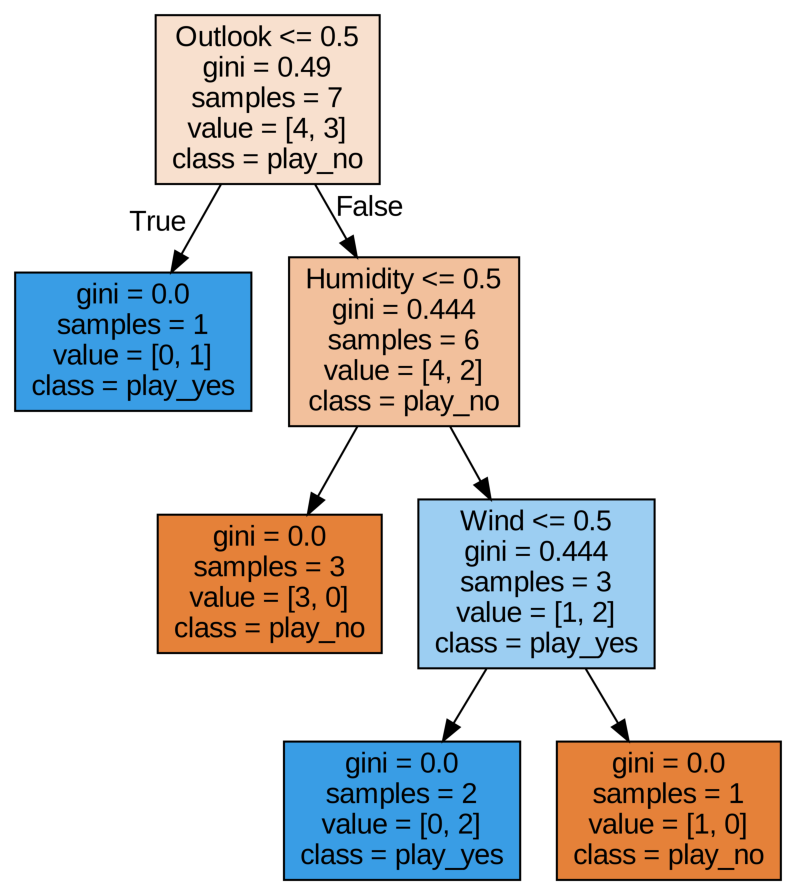

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(clf_entropy,out_file='tree_entropy.dot',feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['play_no','play_yes'],filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])
# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

# **LABWORK 2**

In [9]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

In [10]:
from google.colab import drive
drive.mount("/content/drive")
iris = pd.read_csv('/content/drive/MyDrive/ML_Labs/iris.csv')
print(iris)

Mounted at /content/drive
     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [11]:
X = iris.drop(columns="variety")
y = iris["variety"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20 , random_state = 45)

In [13]:
tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [14]:
print(accuracy_score(y_train,y_train_pred),round(accuracy_score(y_test,y_test_pred),2))

1.0 0.95


In [15]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']
ccp_alphas

array([0.        , 0.00738462, 0.00748988, 0.01390045, 0.28038859,
       0.32497972])

In [16]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print(
"Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]
)
) 

Number of nodes in the last tree is: 1 with ccp_alpha: 0.324979722092946


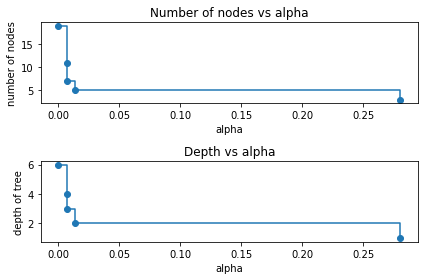

In [17]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

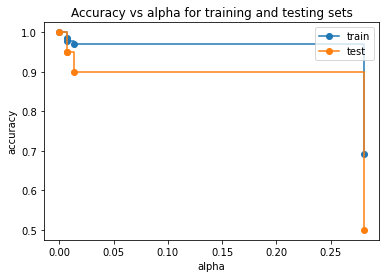

In [18]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# **Exerxise**

[[1, 1, 0, 0], [1, 1, 0, 1], [0, 1, 0, 0], [2, 2, 0, 0], [2, 0, 1, 0], [2, 0, 1, 1], [0, 0, 1, 1], [1, 2, 0, 0], [1, 0, 1, 0], [2, 2, 1, 0], [1, 2, 1, 1], [0, 2, 0, 1], [0, 1, 1, 0], [2, 2, 0, 1]]
[[0], [0], [1], [1], [1], [0], [1], [0], [1], [1], [1], [1], [1], [0]]
[(0, 1, 0, 1), (0, 1, 1, 0), (0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 1, 0), (0, 1, 0, 1), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 1, 0, 0), (1, 1, 0, 0), (0, 0, 1, 1), (0, 0, 1, 1), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 0, 1), (0, 1, 1, 0), (1, 0, 1, 0), (1, 0, 0, 1), (1, 1, 0, 0), (1, 1, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0)]
[1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1]


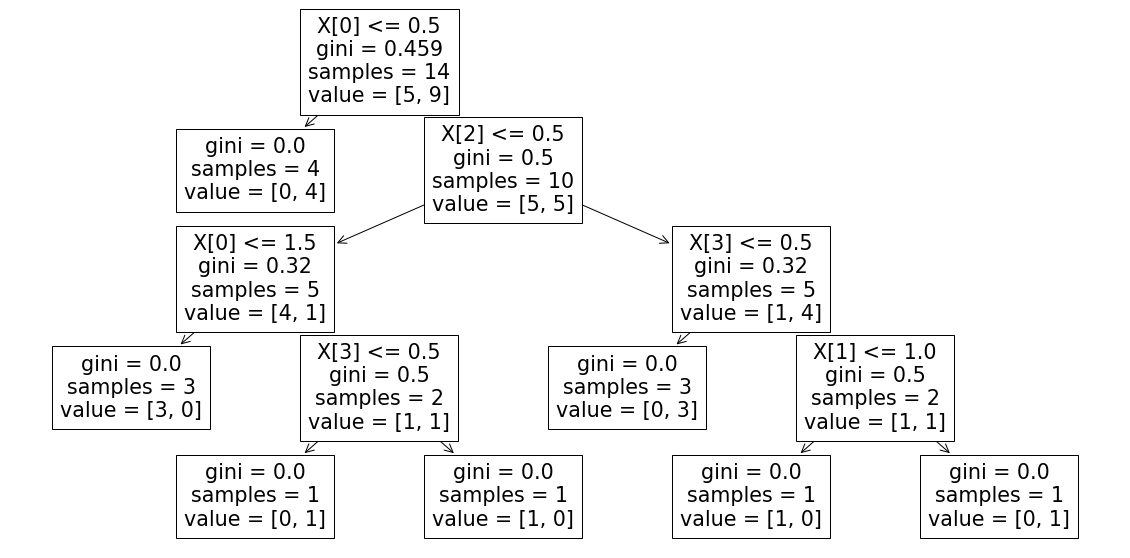

In [19]:
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

prepro=preprocessing

lb=prepro.LabelEncoder()

outlook=lb.fit_transform(outlook)
temp=lb.fit_transform(temp)
humidity=lb.fit_transform(humidity)
wind=lb.fit_transform(wind)
play=lb.fit_transform(play)

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

input=list(zip(outlook,temp,humidity,wind))
output=list(zip(play))

ri=0
for row in input:
  input[ri]=list(row)
  ri+=1

ri=0
for row in output:
  output[ri]=list(row)
  ri+=1

print(input)
print(output)

# model=DecisionTreeClassifier(max_depth=2)
model=DecisionTreeClassifier()
model.fit(input,output)


import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model)


seed=[0,1,0,1]

from itertools import permutations
test_input=list(permutations(seed))
print(test_input)
test_output=model.predict(test_input)
# print(accuracy_score(output, test_output))
# print ('Recall:',recall_score(output, test_output)
# print ('Precision:', precision_score(output, test_output)
print(test_output)


In [21]:
from sklearn.datasets import load_wine
wine= load_wine()
input=wine.data
output=wine.target

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output = train_test_split(input,output,
                                   random_state=146, 
                                   test_size=0.34, 
                                   shuffle=True)


model=DecisionTreeClassifier()
model.fit(train_input,train_output)

test_pred=model.predict(test_input)
x = recall_score(test_pred, test_output,pos_label='positive',
                                           average='micro')
y = recall_score(test_pred, test_output,pos_label='positive',
                                           average='micro')
print('Recall:',x)
print('Precision:',y)
cmat=confusion_matrix(test_pred,test_output)

# truth=sum(cmat[i][i] for i in range(len(cmat)))
# total=0
# for row in cmat:
#   for elem in row:
#     total+=elem
# accuracy=truth/total

#print("accuracy : ",accuracy)
path = model.cost_complexity_pruning_path(train_input,train_output)
alphas = path['ccp_alphas']
alphas

Recall: 0.9180327868852459
Precision: 0.9180327868852459


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


array([0.        , 0.03252033, 0.04761905, 0.29187567])

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

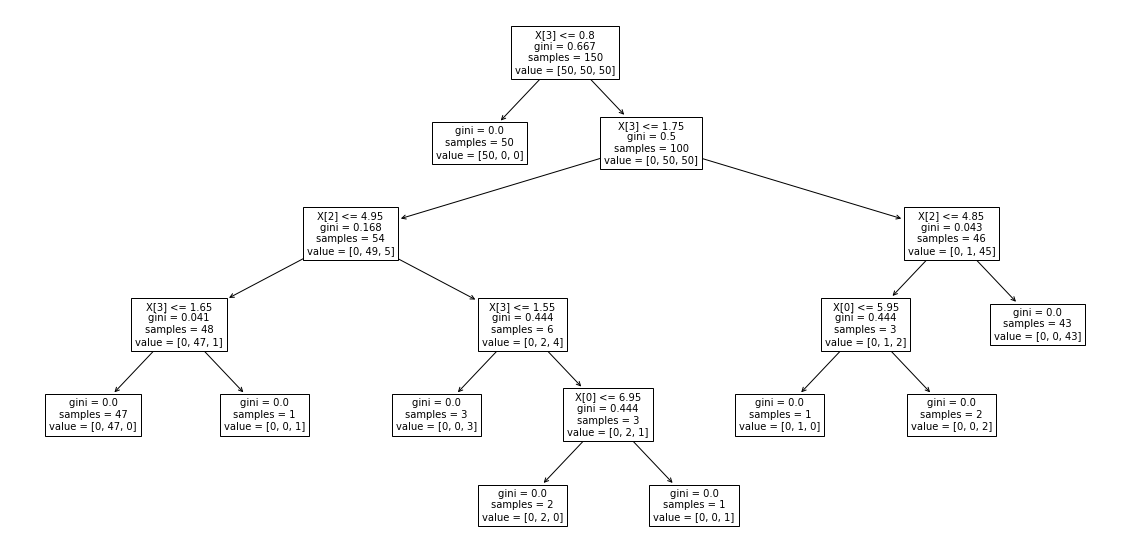

In [22]:
from sklearn.datasets import load_iris
iris= load_iris()
input=iris.data
output=iris.target

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier
model=DT()

model.fit(input,output)
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(model,fontsize=10)
